In [24]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [25]:
X, y, coef = make_regression(n_samples=100, n_features=2, noise=5, random_state=42, coef=True)

In [26]:
coef

array([87.73730719, 74.07686178])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [33]:
class LinearRegCustom:
    
    def __init__(self, lr=.01, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
        
        
    def fit(self, X, y):
        
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        self.theta_ = np.random.randn(1, X.shape[1])
        
        errs = []
        for i in range(self.max_iters):
            #this line have been added for mini batch
            indices = np.random.randint(0, len(X), len(X)//10)
            self.gradient_decend(X[indices], y[indices])
            errs.append(self.error(X, y))
        
        return errs
            
    def gradient_decend(self, X, y):
        delta_theta = self.gradient(X, y)
        self.theta_ += delta_theta
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.hypothesis(X)
        e = yh - ya
        
        de2m = np.dot(e.T, X)/len(X)
        
        return -de2m*self.lr
    
    def error(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.hypothesis(X)
        e = yh - ya
        return np.mean(e**2)
    
    def hypothesis(self, X):
        return np.dot(X, self.theta_.T)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypothesis(X_mod)

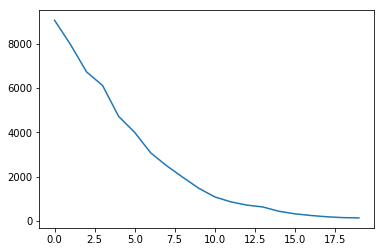

In [34]:
m2 = LinearRegCustom(lr=.1)

errors = m2.fit(X_train, y_train)

plt.figure()
plt.plot(errors)
plt.show()

In [36]:
m2.predict(X_test[:10])

array([[ -50.87134829],
       [   0.60593591],
       [  78.41341446],
       [ -17.68992123],
       [  62.24683464],
       [ 104.86054205],
       [ 177.31980769],
       [-114.47385682],
       [-166.75889814],
       [ -48.6393941 ]])

In [38]:
y_test[:10]

array([ -53.96917117,    1.57590327,   83.23474413,  -26.98206658,
         68.78873855,  125.76670994,  190.71591107, -115.26779066,
       -188.93608596,  -52.57567661])

In [40]:
m2.predict(X_test[:10])

array([[ -50.87134829],
       [   0.60593591],
       [  78.41341446],
       [ -17.68992123],
       [  62.24683464],
       [ 104.86054205],
       [ 177.31980769],
       [-114.47385682],
       [-166.75889814],
       [ -48.6393941 ]])